In [507]:
# Importación de bibliotecas estándar
import numpy as np
import pandas as pd

# Importación de bibliotecas para visualización
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Importación de herramientas para modelos de machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE, RFECV

# Librerías adicionales
import itertools  # Para generar combinaciones de columnas
import matplotlib.patches as mpatches  # Para manejar gráficos

# Importación de módulo personalizado
import payments_manager as pm

# Inicialización del proyecto (si es necesario)
# pm.help()  # Si se necesita ayuda del módulo
# pm.reset()  # Para reiniciar cualquier configuración anterior
# pm.init()  # Si es necesario inicializar el módulo con opciones (por ejemplo, debug=True)

# Cargar y preparar el DataFrame df_jo
df_jo = pm.df('df_jo')  # Cargar el DataFrame desde 'payments_manager'
df_jo.info()  # Ver información básica sobre el DataFrame

# Ordenar el DataFrame df_jo por la columna 'id_cr' y resetear índices
df_jo = df_jo.sort_values(by=["id_cr"]).reset_index(drop=True)

# Crear una copia del DataFrame para su posterior uso
df_jo_cp = df_jo.copy()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32092 entries, 0 to 32091
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   id_cr                       32092 non-null  int64          
 1   id_fe                       32092 non-null  int64          
 2   fe_cr_id                    21055 non-null  float64        
 3   user_id                     32092 non-null  int64          
 4   active                      32092 non-null  int64          
 5   created_at                  32092 non-null  datetime64[ns] 
 6   created_at_fe               21055 non-null  datetime64[ns] 
 7   amount                      32092 non-null  float64        
 8   fee                         32092 non-null  float64        
 9   stat_cr                     32092 non-null  object         
 10  stat_fe                     32092 non-null  object         
 11  transfer_type               32092 non-nul

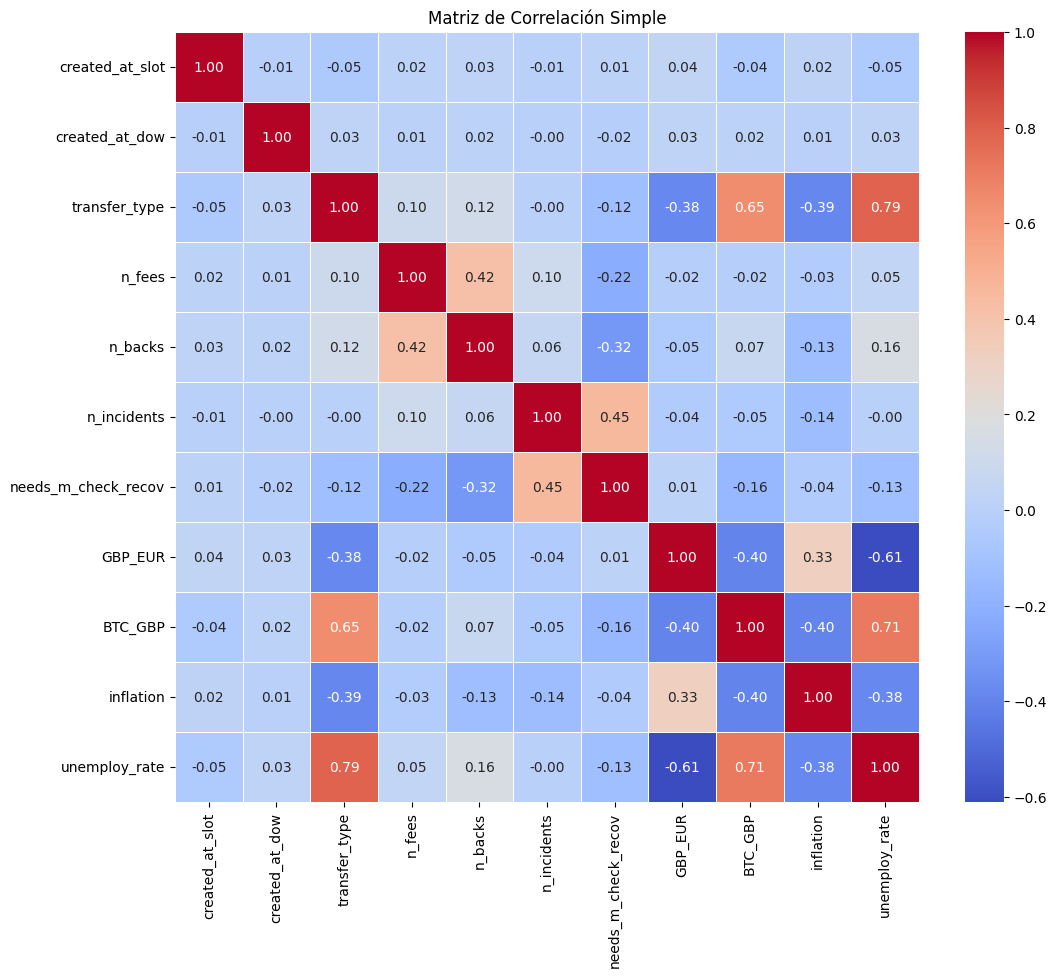

In [508]:
# Lista de columnas que deseas seleccionar del df_jo para el MODELO
columnas_deseadas = ['created_at_slot', 'created_at_dow' ,'transfer_type', 'n_fees', 'n_backs','n_incidents', 'needs_m_check_recov','GBP_EUR','BTC_GBP','inflation', 'unemploy_rate']

# Crear un nuevo DataFrame solamente con esas columnas
df_simpl = df_jo_cp[columnas_deseadas]

# Reasignar valores en la columna 'transfer_type'
df_simpl = df_simpl.copy()
df_simpl['transfer_type'] = df_simpl['transfer_type'].map({'regular': 0, 'instant': 1})

# Calcular la matriz de correlación
m_corr_simpl = df_simpl.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(m_corr_simpl, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación Simple')
plt.show()

In [509]:
# Obtener el conteo de los valores únicos en la columna 'needs_m_check_recov'
value_counts = df_simpl['needs_m_check_recov'].value_counts()

# Calcular el total de operaciones (suma de las dos categorías)
total = value_counts[0] + value_counts[1]

# Calcular el porcentaje de operaciones con 'needs_m_check' (cuando es 1)
needs_manual = (value_counts[1] / total) * 100

# Imprimir el resultado
print(f'Porcentaje de operaciones con needs_m_check: {needs_manual:.2f} %')


Porcentaje de operaciones con needs_m_check: 52.31 %


In [ ]:
# Crea la matriz de características y la var objetivo
X = df_simpl.drop(columns=[
    'needs_m_check_recov',  
    'created_at_slot',      
    'created_at_dow',       
    'transfer_type',
   'n_fees',
#    'n_backs',
#    'n_incidents',
    'GBP_EUR',
    'BTC_GBP',
    'inflation',      
    'unemploy_rate',

])
y = df_simpl['needs_m_check_recov']  # La columna de la variable objetivo

print(X.shape)
print(y.shape)
X.head(50)

(32092, 3)
(32092,)


,n_fees,n_backs,n_incidents
0,6,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1
5,3,1,1
6,0,0,1
7,4,1,0
8,0,0,1
9,0,1,0


In [511]:
# MODELO DE ÁRBOL DE DECISIÓN

# Dividir el dataset en entrenamiento y prueba
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Árbol de Decisión
DT = tree.DecisionTreeClassifier()

# Entrenar el modelo con el conjunto de datos de entrenamiento
DT.fit(train_X, train_y)

# Realizar predicciones sobre el conjunto de prueba
predictions = DT.predict(test_X)




Precisión del modelo: 0.9081

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.93      0.86      0.90      3003
           1       0.89      0.95      0.92      3416

    accuracy                           0.91      6419
   macro avg       0.91      0.91      0.91      6419
weighted avg       0.91      0.91      0.91      6419


Importancia de las características (ordenadas por magnitud):
n_incidents: 0.8738
n_backs: 0.0932
n_fees: 0.0330


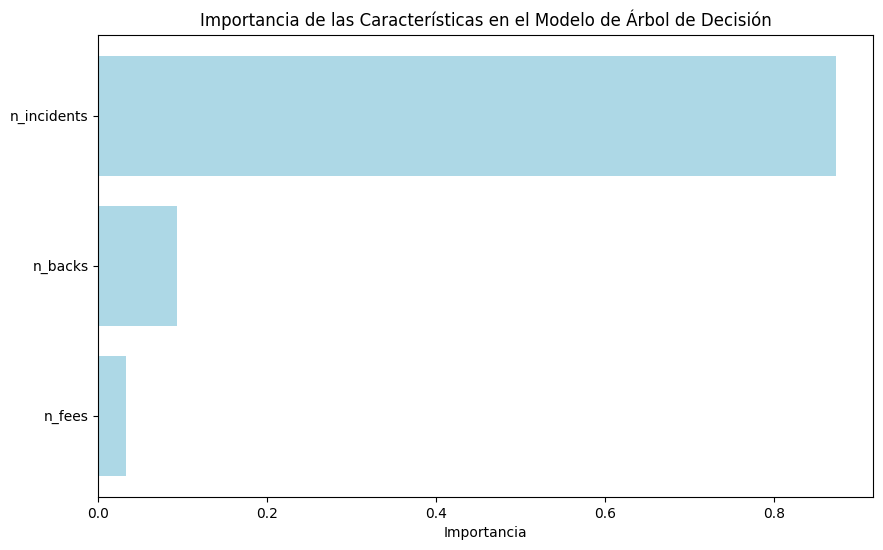

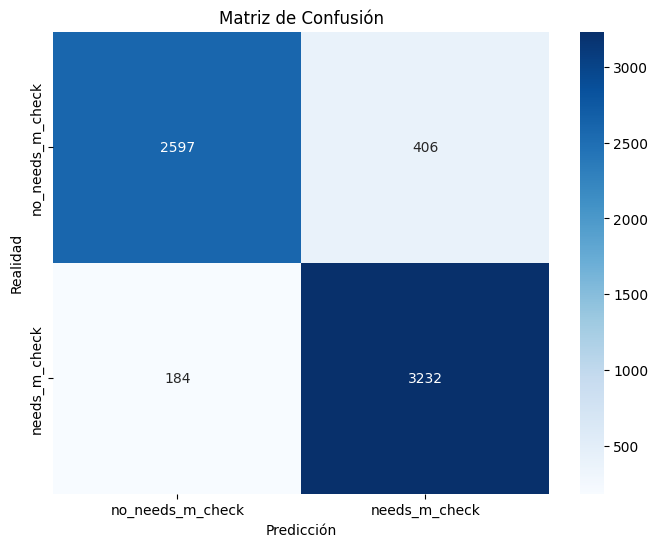

In [512]:
# Evaluación del rendimiento del modelo

# 1. Precisión del modelo
accuracy = DT.score(test_X, test_y)
print(f"Precisión del modelo: {accuracy:.4f}")  # Precisión en el conjunto de prueba

# 2. Reporte de clasificación
print("\nReporte de clasificación:\n", classification_report(test_y, predictions))  
# Muestra el reporte con métricas como precisión, recall, f1-score para cada clase

# 3. Importancia de las características

# Extraer los nombres de las características
feature_names = X.columns

# Obtener las importancias de las características del modelo
feature_importances = DT.feature_importances_

# Crear una lista de tuplas con el nombre de la característica y su importancia
feature_importance = list(zip(feature_names, feature_importances))

# Ordenar las características por la importancia en orden descendente
feature_importance_sorted = sorted(feature_importance, key=lambda x: abs(x[1]), reverse=True)

# Imprimir las características ordenadas por importancia
print("\nImportancia de las características (ordenadas por magnitud):")
for feature, importance in feature_importance_sorted:
    print(f"{feature}: {importance:.4f}")

# 4. Visualización de la importancia de las características

# Graficar las importancias de las características
plt.figure(figsize=(10, 6))
features = [f[0] for f in sorted(feature_importance, key=lambda x: abs(x[1]), reverse=False)]
importances = [f[1] for f in sorted(feature_importance, key=lambda x: abs(x[1]), reverse=False)]

# Crear el gráfico de barras
plt.barh(features, importances, color='lightblue')
plt.xlabel("Importancia")
plt.title("Importancia de las Características en el Modelo de Árbol de Decisión")
plt.show()

# 5. Matriz de confusión

# Nombres de las clases para la matriz de confusión
columnas = ['no_needs_m_check', 'needs_m_check']  # 0 = No, 1 = Sí

# Visualización de la matriz de confusión con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(test_y, predictions), annot=True, fmt='d', cmap='Blues', 
            xticklabels=columnas, yticklabels=columnas)

# Personalización de los ejes
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.title("Matriz de Confusión")
plt.show()



In [513]:
# MODELO RANDOM FOREST
X_rf = df_simpl.drop(columns='needs_m_check_recov')
Y_rf = df_simpl['needs_m_check_recov']  

# Se escoge el modelo para evaluar el subset de atributos
RF = RandomForestClassifier()
# Se escoge el número de los atributos a seleccionar
rfe = RFE(RF)
rfe = rfe.fit(X_rf, Y_rf)
print('Mejores características: ',X_rf.columns[rfe.support_])


Mejores características:  Index(['n_fees', 'n_backs', 'n_incidents', 'GBP_EUR', 'BTC_GBP'], dtype='object')


In [514]:
# Crear el clasificador RandomForest
clf_rf_4 = RandomForestClassifier()

# Inicializar RFECV con validación cruzada (3-fold)
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=3, scoring='accuracy')  # 3-fold cross-validation

# Ajustar el modelo
rfecv = rfecv.fit(X_rf, Y_rf)

# Mostrar el número óptimo de características seleccionadas
print('Número óptimo de características:', rfecv.n_features_)

# Mostrar las mejores características seleccionadas
print('Mejores características:', X_rf.columns[rfecv.support_])

Número óptimo de características: 2
Mejores características: Index(['n_backs', 'n_incidents'], dtype='object')


In [515]:
# Dividir el dataset en entrenamiento y prueba
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo RandomForest
RF = RandomForestClassifier()

# Entrenar el modelo con el conjunto de datos de entrenamiento
RF.fit(train_X, train_y)

# Realizar predicciones sobre el conjunto de prueba
predictions = RF.predict(test_X)




Precisión del modelo: 0.9084

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.94      0.86      0.90      3003
           1       0.89      0.95      0.92      3416

    accuracy                           0.91      6419
   macro avg       0.91      0.91      0.91      6419
weighted avg       0.91      0.91      0.91      6419


Importancia de las características (ordenadas por magnitud):
n_incidents: 0.7275
n_backs: 0.1704
n_fees: 0.1021


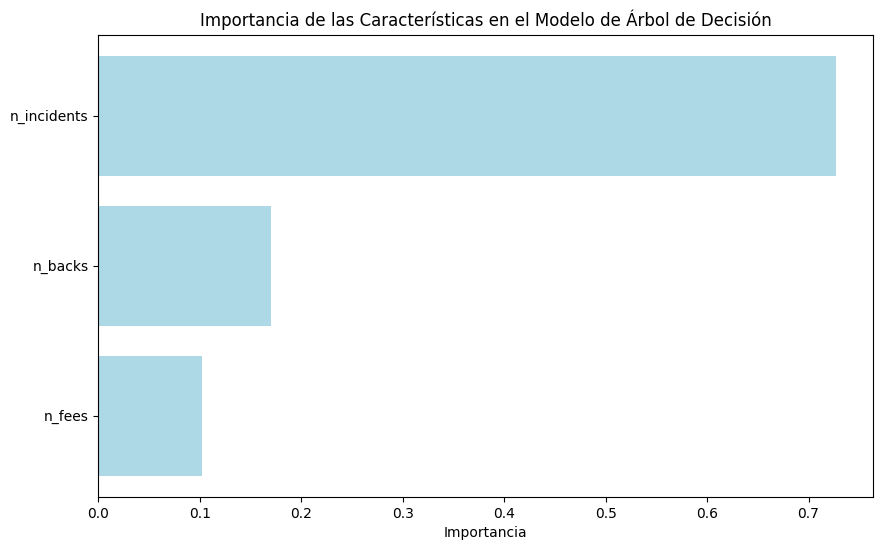

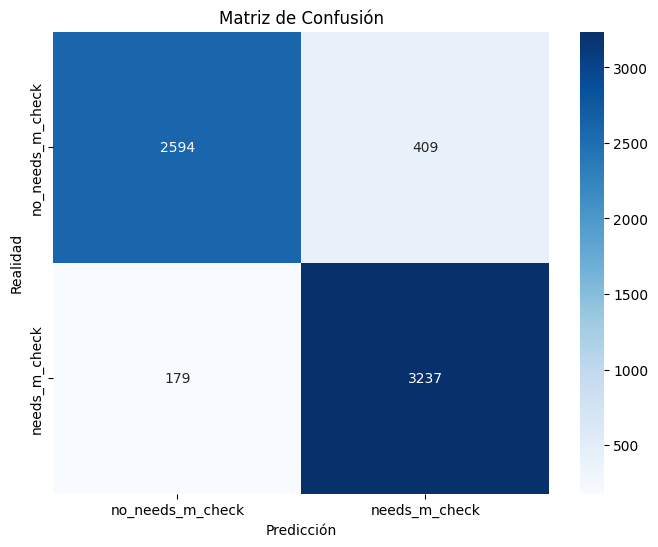

In [516]:
# Evaluación del rendimiento del modelo

# 1. Precisión del modelo
accuracy = RF.score(test_X, test_y)
print(f"Precisión del modelo: {accuracy:.4f}")  # Precisión en el conjunto de prueba

# 2. Reporte de clasificación
print("\nReporte de clasificación:\n", classification_report(test_y, predictions))  
# Muestra el reporte con métricas como precisión, recall, f1-score para cada clase

# 3. Importancia de las características

# Extraer los nombres de las características
feature_names = X.columns

# Obtener las importancias de las características del modelo
feature_importances = RF.feature_importances_

# Crear una lista de tuplas con el nombre de la característica y su importancia
feature_importance = list(zip(feature_names, feature_importances))

# Ordenar las características por la importancia en orden descendente
feature_importance_sorted = sorted(feature_importance, key=lambda x: abs(x[1]), reverse=True)

# Imprimir las características ordenadas por importancia
print("\nImportancia de las características (ordenadas por magnitud):")
for feature, importance in feature_importance_sorted:
    print(f"{feature}: {importance:.4f}")

# 4. Visualización de la importancia de las características

# Graficar las importancias de las características
plt.figure(figsize=(10, 6))
features = [f[0] for f in sorted(feature_importance, key=lambda x: abs(x[1]), reverse=False)]
importances = [f[1] for f in sorted(feature_importance, key=lambda x: abs(x[1]), reverse=False)]

# Crear el gráfico de barras
plt.barh(features, importances, color='lightblue')
plt.xlabel("Importancia")
plt.title("Importancia de las Características en el Modelo de Árbol de Decisión")
plt.show()

# 5. Matriz de confusión

# Nombres de las clases para la matriz de confusión
columnas = ['no_needs_m_check', 'needs_m_check']  # 0 = No, 1 = Sí

# Visualización de la matriz de confusión con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(test_y, predictions), annot=True, fmt='d', cmap='Blues', 
            xticklabels=columnas, yticklabels=columnas)

# Personalización de los ejes
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.title("Matriz de Confusión")
plt.show()


In [517]:
# NORMALIZACION Y ESCALADO

print('Distribución del dataset en términos de mínimos y máximos por variable:')
mins = [X_for_n[col].min() for col in X_for_n.columns]
print('Minimos por variable: ', mins)
maxs = [X_for_n[col].max() for col in X_for_n.columns]
print('Maximos por variable: ', maxs)

Distribución del dataset en términos de mínimos y máximos por variable:
Minimos por variable:  [np.int64(0), np.int64(0), np.int64(0), np.float64(3954.907958984375), np.float64(4.0)]
Maximos por variable:  [np.int64(15), np.int64(11), np.int64(33), np.float64(10478.1376953125), np.float64(5.2)]


In [518]:
# Normalización
s_scaler = StandardScaler()
df_s = s_scaler.fit_transform(X_for_n)
df_s = pd.DataFrame(df_s, columns=col_names)

<Axes: ylabel='Density'>

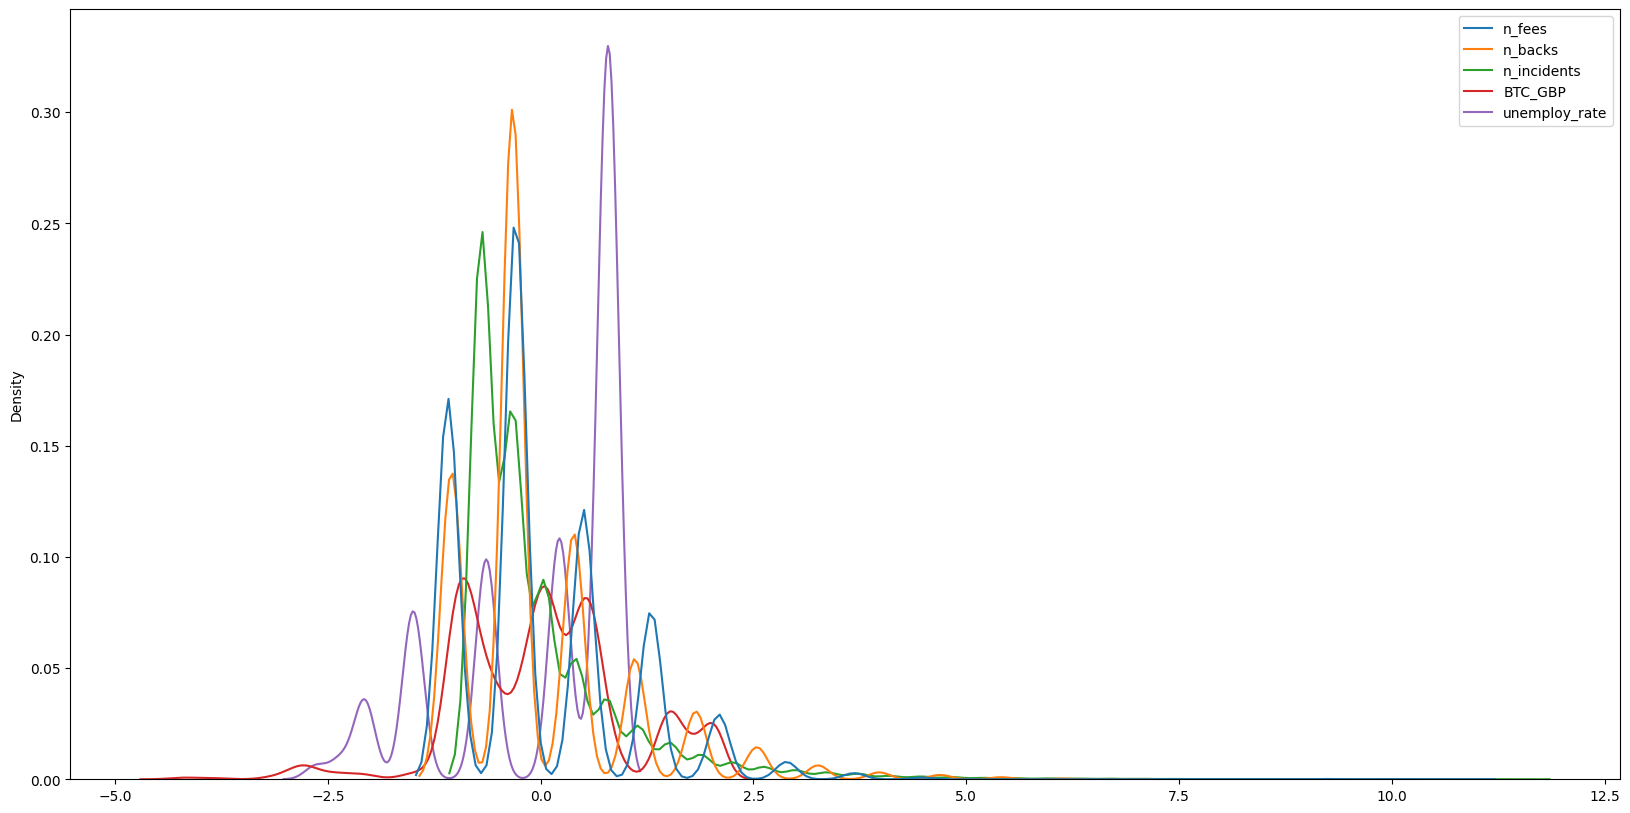

In [519]:
plt.rcParams['figure.figsize']=[20,10]
sns.kdeplot(data=df_s[col_names])

In [520]:
# Se concatena el dataset normalizado de las variables cuantitativas con los factores
df_s = pd.concat([X_rest, X_for_n], axis = 1)

In [521]:
print('Distribución del dataset en términos de mínimos y máximos por variable DESPUES DE NORMALIZAR:')

mins = [df_s[col].min() for col in df_s.columns]
print('Minimos por variable: ', mins)
maxs = [df_s[col].max() for col in df_s.columns]
print('Maximos por variable: ', maxs)

Distribución del dataset en términos de mínimos y máximos por variable DESPUES DE NORMALIZAR:
Minimos por variable:  [np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.float64(3954.907958984375), np.float64(4.0)]
Maximos por variable:  [np.int64(1), np.int64(15), np.int64(11), np.int64(33), np.float64(10478.1376953125), np.float64(5.2)]


In [522]:
df_s

,transfer_type,n_fees,n_backs,n_incidents,BTC_GBP,unemploy_rate
0,0,6,0,1,6347.577148,4.0
1,0,0,1,0,5630.115723,4.0
2,0,0,0,1,5543.707520,4.0
3,0,0,0,1,5543.707520,4.0
4,0,0,0,1,5543.707520,4.0
...,...,...,...,...,...,...
32087,1,2,2,1,NaN,5.2
32088,1,3,3,0,NaN,5.2
32089,1,2,2,8,NaN,5.2
32090,1,1,1,0,NaN,5.2
